# Pandas

**(1) Pandas is an open-source data manipulation and analysis library for the Python programming language.**  <br> 

**(2) It provides data structures for efficiently storing and manipulating large datasets  and tools for working with tabular and time-series data.**<br>

**(3) The primary data structures in Pandas are the Series and DataFrame.**  <br>

**(4) A Series is a one-dimensional array-like object that can hold any data type, while a DataFrame is a two-dimensional table-like data structure with columns of potentially different data types.**<br>

**(5) Pandas provides a wide range of functionalities for data manipulation and analysis, including reading and writing data from various file formats (CSV, Excel, SQL databases, etc.)**<br>

**(6) Data cleaning and preprocessing, data filtering and selection, grouping and aggregation, merging and joining, reshaping and pivoting, time-series analysis, and more.**<br>

**(7) Pandas is widely used in data analysis, machine learning, and scientific computing, and is a fundamental tool in the Python data science ecosystem.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Object Creation

In [2]:
#Creating a Series by passing a list of values, letting pandas create a default integer index.
s = pd.Series([1,3,5,np.nan,6,8,np.nan])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
6    NaN
dtype: float64

In [4]:
#Creating a DataFrameby passing a numpy array, with a datetime index and labeled columns.
dates = pd.date_range('20230505', periods=6)

In [5]:
dates

DatetimeIndex(['2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10'],
              dtype='datetime64[ns]', freq='D')

In [6]:
start_date = '2023-05-01 00:00:00'
end_date = '2023-05-05 00:00:00'

dt_index = pd.date_range(start=start_date, end=end_date, freq='H')

print(dt_index)

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 01:00:00',
               '2023-05-01 02:00:00', '2023-05-01 03:00:00',
               '2023-05-01 04:00:00', '2023-05-01 05:00:00',
               '2023-05-01 06:00:00', '2023-05-01 07:00:00',
               '2023-05-01 08:00:00', '2023-05-01 09:00:00',
               '2023-05-01 10:00:00', '2023-05-01 11:00:00',
               '2023-05-01 12:00:00', '2023-05-01 13:00:00',
               '2023-05-01 14:00:00', '2023-05-01 15:00:00',
               '2023-05-01 16:00:00', '2023-05-01 17:00:00',
               '2023-05-01 18:00:00', '2023-05-01 19:00:00',
               '2023-05-01 20:00:00', '2023-05-01 21:00:00',
               '2023-05-01 22:00:00', '2023-05-01 23:00:00',
               '2023-05-02 00:00:00', '2023-05-02 01:00:00',
               '2023-05-02 02:00:00', '2023-05-02 03:00:00',
               '2023-05-02 04:00:00', '2023-05-02 05:00:00',
               '2023-05-02 06:00:00', '2023-05-02 07:00:00',
               '2023-05-

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2023-05-05,0.021659,1.221645,-0.738822,-1.059832
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706
2023-05-08,0.175529,-0.911489,-0.531176,1.762255
2023-05-09,-0.990478,-0.267235,0.939321,0.513438
2023-05-10,-0.255577,0.291297,-0.227027,0.206399


In [9]:
#Creating a DataFrameby passing a dict of objects that can be converted to series - like

df2 = pd.DataFrame({
    'A': 1.0,
    'B': pd.Timestamp('20230505'),
    'C': pd.Series([1.0, 2.0, 3.0, 4.0], index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test","train","test","train"]),
    'F': 'Model'
})

print(df2)

     A          B    C  D      E      F
0  1.0 2023-05-05  1.0  3   test  Model
1  1.0 2023-05-05  2.0  3  train  Model
2  1.0 2023-05-05  3.0  3   test  Model
3  1.0 2023-05-05  4.0  3  train  Model


In [10]:
#specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
df2.A #It returns a Pandas Series object containing all the values in the "A" column.

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [12]:
df2.abs

<bound method NDFrame.abs of      A          B    C  D      E      F
0  1.0 2023-05-05  1.0  3   test  Model
1  1.0 2023-05-05  2.0  3  train  Model
2  1.0 2023-05-05  3.0  3   test  Model
3  1.0 2023-05-05  4.0  3  train  Model>

In [13]:
df2.corr

<bound method DataFrame.corr of      A          B    C  D      E      F
0  1.0 2023-05-05  1.0  3   test  Model
1  1.0 2023-05-05  2.0  3  train  Model
2  1.0 2023-05-05  3.0  3   test  Model
3  1.0 2023-05-05  4.0  3  train  Model>

In [14]:
df2.corr()

,A,C,D
A,NaN,NaN,NaN
C,NaN,1.0,NaN
D,NaN,NaN,NaN


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes


# Viewing Data

In [16]:
#See the top & bottom rows of the frame
df2.head()

,A,B,C,D,E,F
0,1.0,2023-05-05,1.0,3,test,Model
1,1.0,2023-05-05,2.0,3,train,Model
2,1.0,2023-05-05,3.0,3,test,Model
3,1.0,2023-05-05,4.0,3,train,Model


In [17]:
df2.tail()

,A,B,C,D,E,F
0,1.0,2023-05-05,1.0,3,test,Model
1,1.0,2023-05-05,2.0,3,train,Model
2,1.0,2023-05-05,3.0,3,test,Model
3,1.0,2023-05-05,4.0,3,train,Model


In [18]:
df.head(3)

,A,B,C,D
2023-05-05,0.021659,1.221645,-0.738822,-1.059832
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706


In [19]:
df.tail(3)

,A,B,C,D
2023-05-08,0.175529,-0.911489,-0.531176,1.762255
2023-05-09,-0.990478,-0.267235,0.939321,0.513438
2023-05-10,-0.255577,0.291297,-0.227027,0.206399


# Display the index, columns, and the underlying numpy data

In [20]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [21]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [22]:
df2.values

array([[1.0, Timestamp('2023-05-05 00:00:00'), 1.0, 3, 'test', 'Model'],
       [1.0, Timestamp('2023-05-05 00:00:00'), 2.0, 3, 'train', 'Model'],
       [1.0, Timestamp('2023-05-05 00:00:00'), 3.0, 3, 'test', 'Model'],
       [1.0, Timestamp('2023-05-05 00:00:00'), 4.0, 3, 'train', 'Model']],
      dtype=object)

# Describe shows a quick statistic summary of your data

In [23]:
df2.describe()

,A,C,D
count,4.0,4.000000,4.0
mean,1.0,2.500000,3.0
std,0.0,1.290994,0.0
min,1.0,1.000000,3.0
25%,1.0,1.750000,3.0
50%,1.0,2.500000,3.0
75%,1.0,3.250000,3.0
max,1.0,4.000000,3.0


# Transposing your data

In [24]:
df2.T

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2023-05-05 00:00:00,2023-05-05 00:00:00,2023-05-05 00:00:00,2023-05-05 00:00:00
C,1.0,2.0,3.0,4.0
D,3,3,3,3
E,test,train,test,train
F,Model,Model,Model,Model


# Sorting by an axis

In [25]:
df2.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,Model,test,3,1.0,2023-05-05,1.0
1,Model,train,3,2.0,2023-05-05,1.0
2,Model,test,3,3.0,2023-05-05,1.0
3,Model,train,3,4.0,2023-05-05,1.0


# Sorting by values

In [26]:
 df.sort_values(by='B')

,A,B,C,D
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-08,0.175529,-0.911489,-0.531176,1.762255
2023-05-09,-0.990478,-0.267235,0.939321,0.513438
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706
2023-05-10,-0.255577,0.291297,-0.227027,0.206399
2023-05-05,0.021659,1.221645,-0.738822,-1.059832


In [27]:
 df2.sort_values(by='B')

,A,B,C,D,E,F
0,1.0,2023-05-05,1.0,3,test,Model
1,1.0,2023-05-05,2.0,3,train,Model
2,1.0,2023-05-05,3.0,3,test,Model
3,1.0,2023-05-05,4.0,3,train,Model


# Getting
Selecting a single column, which yields a Series, equivalent to df.A

In [28]:
df['A']

2023-05-05    0.021659
2023-05-06    0.437865
2023-05-07    1.700886
2023-05-08    0.175529
2023-05-09   -0.990478
2023-05-10   -0.255577
Freq: D, Name: A, dtype: float64

In [29]:
#Selecting via [], which slices the rows

df[0:3]

,A,B,C,D
2023-05-05,0.021659,1.221645,-0.738822,-1.059832
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706


In [30]:
df2[0:3]

,A,B,C,D,E,F
0,1.0,2023-05-05,1.0,3,test,Model
1,1.0,2023-05-05,2.0,3,train,Model
2,1.0,2023-05-05,3.0,3,test,Model


In [31]:
 df['20230505':'20230509']

,A,B,C,D
2023-05-05,0.021659,1.221645,-0.738822,-1.059832
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706
2023-05-08,0.175529,-0.911489,-0.531176,1.762255
2023-05-09,-0.990478,-0.267235,0.939321,0.513438


# Selection by Label
See more in Selection by Label
For getting a cross section using a label

In [32]:
df.loc[dates[0]]

A    0.021659
B    1.221645
C   -0.738822
D   -1.059832
Name: 2023-05-05 00:00:00, dtype: float64

# Selecting on a multi- axis by label

In [33]:
df.loc[:,['A','B']]

,A,B
2023-05-05,0.021659,1.221645
2023-05-06,0.437865,-1.232005
2023-05-07,1.700886,-0.049315
2023-05-08,0.175529,-0.911489
2023-05-09,-0.990478,-0.267235
2023-05-10,-0.255577,0.291297


In [34]:
#Showing label slicing, both endpoints are included
df.loc['20230505':'20230509',['A','B']]

,A,B
2023-05-05,0.021659,1.221645
2023-05-06,0.437865,-1.232005
2023-05-07,1.700886,-0.049315
2023-05-08,0.175529,-0.911489
2023-05-09,-0.990478,-0.267235


In [35]:
#Reduction in the dimensions of the returned object
df.loc['20230505',['A','B']]

A    0.021659
B    1.221645
Name: 2023-05-05 00:00:00, dtype: float64

In [36]:
#For getting a scalar value
df.loc[dates[0],'A']

0.021658634319909404

In [37]:
#For getting fast access to a scalar (equiv to the prior method)
df.at[dates[0],'A']

0.021658634319909404

# Selection by Position
Select via the position of the passed integers

In [38]:
df.iloc[3]

A    0.175529
B   -0.911489
C   -0.531176
D    1.762255
Name: 2023-05-08 00:00:00, dtype: float64

In [39]:
df.iloc[3:5,0:2]

,A,B
2023-05-08,0.175529,-0.911489
2023-05-09,-0.990478,-0.267235


In [40]:
#By lists of integer position locations, similar to the numpy/python style
df.iloc[[1,2,4],[0,2]]

,A,C
2023-05-06,0.437865,0.797895
2023-05-07,1.700886,-0.354543
2023-05-09,-0.990478,0.939321


In [41]:
#For slicing rows explicitly
df.iloc[1:3,:]

,A,B,C,D
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706


In [42]:
#For slicing columns explicitly
df.iloc[:,1:3]

,B,C
2023-05-05,1.221645,-0.738822
2023-05-06,-1.232005,0.797895
2023-05-07,-0.049315,-0.354543
2023-05-08,-0.911489,-0.531176
2023-05-09,-0.267235,0.939321
2023-05-10,0.291297,-0.227027


In [43]:
#For getting a value explicitly
df.iloc[1,1]

-1.2320046009561973

In [44]:
#For getting fast access to a scalar (equiv to the prior method)
df.iat[1,1]

-1.2320046009561973

# Boolean Indexing
Using a single column’s values to select data

In [45]:
 df[df.A > 0]

,A,B,C,D
2023-05-05,0.021659,1.221645,-0.738822,-1.059832
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706
2023-05-08,0.175529,-0.911489,-0.531176,1.762255


In [46]:
#A where operation for getting.
df[df > 0]

,A,B,C,D
2023-05-05,0.021659,1.221645,NaN,NaN
2023-05-06,0.437865,NaN,0.797895,NaN
2023-05-07,1.700886,NaN,NaN,NaN
2023-05-08,0.175529,NaN,NaN,1.762255
2023-05-09,NaN,NaN,0.939321,0.513438
2023-05-10,NaN,0.291297,NaN,0.206399


In [47]:
#method for filtering
df_copy = df.copy()

In [48]:
df_copy

,A,B,C,D
2023-05-05,0.021659,1.221645,-0.738822,-1.059832
2023-05-06,0.437865,-1.232005,0.797895,-1.294381
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706
2023-05-08,0.175529,-0.911489,-0.531176,1.762255
2023-05-09,-0.990478,-0.267235,0.939321,0.513438
2023-05-10,-0.255577,0.291297,-0.227027,0.206399


In [49]:
df_copy['E'] = ['one', 'one','two','three','four','three']

In [50]:
df_copy

,A,B,C,D,E
2023-05-05,0.021659,1.221645,-0.738822,-1.059832,one
2023-05-06,0.437865,-1.232005,0.797895,-1.294381,one
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706,two
2023-05-08,0.175529,-0.911489,-0.531176,1.762255,three
2023-05-09,-0.990478,-0.267235,0.939321,0.513438,four
2023-05-10,-0.255577,0.291297,-0.227027,0.206399,three


In [51]:
df_copy[df_copy['E'].isin(['two','four'])]

,A,B,C,D,E
2023-05-07,1.700886,-0.049315,-0.354543,-0.134706,two
2023-05-09,-0.990478,-0.267235,0.939321,0.513438,four


# Setting
Setting a new column automatically aligns the data by the indexes

In [52]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20230507', periods=6))

In [53]:
s1

2023-05-07    1
2023-05-08    2
2023-05-09    3
2023-05-10    4
2023-05-11    5
2023-05-12    6
Freq: D, dtype: int64

In [54]:
df['F'] = s

In [55]:
#Setting values by label
df.at[dates[0],'A'] = 0

In [56]:
#Setting values by position
df.iat[0,1] = 0

In [57]:
#Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

In [58]:
#The result of the prior setting operations
df

,A,B,C,D,F
2023-05-05,0.000000,0.000000,-0.738822,5,NaN
2023-05-06,0.437865,-1.232005,0.797895,5,NaN
2023-05-07,1.700886,-0.049315,-0.354543,5,NaN
2023-05-08,0.175529,-0.911489,-0.531176,5,NaN
2023-05-09,-0.990478,-0.267235,0.939321,5,NaN
2023-05-10,-0.255577,0.291297,-0.227027,5,NaN


In [59]:
df_copy = df.copy()

In [60]:
df_copy

,A,B,C,D,F
2023-05-05,0.000000,0.000000,-0.738822,5,NaN
2023-05-06,0.437865,-1.232005,0.797895,5,NaN
2023-05-07,1.700886,-0.049315,-0.354543,5,NaN
2023-05-08,0.175529,-0.911489,-0.531176,5,NaN
2023-05-09,-0.990478,-0.267235,0.939321,5,NaN
2023-05-10,-0.255577,0.291297,-0.227027,5,NaN


# Missing Data
pandas primarily uses the value np.nan to represent missing data. 
It is by default not included in computations. 
Reindexing allows you to change/add/delete the index on a specified axis. 
This returns a copy of the data.

In [61]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [62]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [63]:
df1   

,A,B,C,D,F,E
2023-05-05,0.000000,0.000000,-0.738822,5,NaN,1.0
2023-05-06,0.437865,-1.232005,0.797895,5,NaN,1.0
2023-05-07,1.700886,-0.049315,-0.354543,5,NaN,NaN
2023-05-08,0.175529,-0.911489,-0.531176,5,NaN,NaN


In [64]:
#To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E


In [65]:
df1.fillna(value=5)

,A,B,C,D,F,E
2023-05-05,0.000000,0.000000,-0.738822,5,5.0,1.0
2023-05-06,0.437865,-1.232005,0.797895,5,5.0,1.0
2023-05-07,1.700886,-0.049315,-0.354543,5,5.0,5.0
2023-05-08,0.175529,-0.911489,-0.531176,5,5.0,5.0


In [66]:
#To get the boolean mask where values are nan
pd.isnull(df1)

,A,B,C,D,F,E
2023-05-05,False,False,False,False,True,False
2023-05-06,False,False,False,False,True,False
2023-05-07,False,False,False,False,True,True
2023-05-08,False,False,False,False,True,True


# Operations
Operations in general exclude missing data.<br>
Performing a descriptive statistics

In [67]:
df.mean()

A    0.178037
B   -0.361458
C   -0.019059
D    5.000000
F         NaN
dtype: float64

In [68]:
#Same operation on the other axis
df.mean()

A    0.178037
B   -0.361458
C   -0.019059
D    5.000000
F         NaN
dtype: float64

In [69]:
#Operating with objects that have different dimensionality and need alignment. 
#In addition, pandas automatically broadcasts along the specified dimension
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [70]:
s

2023-05-05    NaN
2023-05-06    NaN
2023-05-07    1.0
2023-05-08    3.0
2023-05-09    5.0
2023-05-10    NaN
Freq: D, dtype: float64

In [71]:
#Apply Applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2023-05-05,0.000000,0.000000,-0.738822,5,NaN
2023-05-06,0.437865,-1.232005,0.059073,10,NaN
2023-05-07,2.138751,-1.281320,-0.295470,15,NaN
2023-05-08,2.314280,-2.192808,-0.826647,20,NaN
2023-05-09,1.323801,-2.460044,0.112674,25,NaN
2023-05-10,1.068224,-2.168747,-0.114353,30,NaN


In [72]:
df.apply(lambda x: x.max() - x.min())

A    2.691364
B    1.523301
C    1.678142
D    0.000000
F         NaN
dtype: float64

## Histogramming and Discretization

In [73]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [74]:
s

0    6
1    6
2    5
3    0
4    0
5    2
6    0
7    6
8    4
9    1
dtype: int32

In [75]:
s.value_counts()

6    3
0    3
5    1
2    1
4    1
1    1
dtype: int64

In [76]:
#String Methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [77]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [78]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
Concat pandas provides various facilities for easily combining together Series, DataFrame, and Panel
objects with various kinds of set logic for the indexes and relational algebra functionality in the case
of join / merge - type operations.

In [79]:
df = pd.DataFrame(np.random.randn(10, 4))

In [80]:
df

,0,1,2,3
0,1.193990,-1.554871,1.427580,-2.039391
1,-0.750653,-2.641225,-1.780337,-0.181015
2,-0.269861,0.924073,-1.219922,-0.305188
3,-0.256986,-0.250177,1.150469,0.059663
4,-0.319048,0.479679,0.073869,-0.616349
5,-0.369572,1.230688,-0.165730,2.142065
6,0.148123,1.017972,0.145149,1.177582
7,-1.948903,0.486573,-0.546881,1.883717
8,-1.680163,0.833985,1.004954,1.900439
9,0.129814,2.036160,-1.355539,0.957651


In [81]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [82]:
pieces

[          0         1         2         3
 0  1.193990 -1.554871  1.427580 -2.039391
 1 -0.750653 -2.641225 -1.780337 -0.181015
 2 -0.269861  0.924073 -1.219922 -0.305188,
           0         1         2         3
 3 -0.256986 -0.250177  1.150469  0.059663
 4 -0.319048  0.479679  0.073869 -0.616349
 5 -0.369572  1.230688 -0.165730  2.142065
 6  0.148123  1.017972  0.145149  1.177582,
           0         1         2         3
 7 -1.948903  0.486573 -0.546881  1.883717
 8 -1.680163  0.833985  1.004954  1.900439
 9  0.129814  2.036160 -1.355539  0.957651]

In [83]:
pd.concat(pieces)

,0,1,2,3
0,1.193990,-1.554871,1.427580,-2.039391
1,-0.750653,-2.641225,-1.780337,-0.181015
2,-0.269861,0.924073,-1.219922,-0.305188
3,-0.256986,-0.250177,1.150469,0.059663
4,-0.319048,0.479679,0.073869,-0.616349
5,-0.369572,1.230688,-0.165730,2.142065
6,0.148123,1.017972,0.145149,1.177582
7,-1.948903,0.486573,-0.546881,1.883717
8,-1.680163,0.833985,1.004954,1.900439
9,0.129814,2.036160,-1.355539,0.957651


# Join
SQL style merges.

In [84]:
left = pd.DataFrame({'key': ['Sunil', 'Sunil'], 'leftval': [1, 2]})

In [85]:
right = pd.DataFrame({'key': ['Sunil', 'Sunil'], 'rightval': [4, 5]})

In [86]:
left

,key,leftval
0,Sunil,1
1,Sunil,2


In [87]:
right

,key,rightval
0,Sunil,4
1,Sunil,5


In [88]:
pd.merge(left, right, on='key')

,key,leftval,rightval
0,Sunil,1,4
1,Sunil,1,5
2,Sunil,2,4
3,Sunil,2,5


# Append
Append rows to a dataframe.

In [89]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [90]:
df

,A,B,C,D
0,0.785358,-1.022416,-0.273822,-1.347935
1,-0.166068,-0.705203,-1.091386,-0.967488
2,0.751212,-0.088651,0.689955,-0.873440
3,0.273496,-0.346546,-0.535401,-2.144910
4,1.401862,0.751662,0.170407,1.357429
5,0.287059,-1.338169,-0.584550,0.049731
6,0.264467,-0.253378,-0.332302,0.221343
7,-0.250742,-0.230552,-1.275301,1.400346


In [91]:
s = df.iloc[3]

In [92]:
s

A    0.273496
B   -0.346546
C   -0.535401
D   -2.144910
Name: 3, dtype: float64

In [93]:
df.append(s, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_968\4011806271.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,0.785358,-1.022416,-0.273822,-1.347935
1,-0.166068,-0.705203,-1.091386,-0.967488
2,0.751212,-0.088651,0.689955,-0.873440
3,0.273496,-0.346546,-0.535401,-2.144910
4,1.401862,0.751662,0.170407,1.357429
5,0.287059,-1.338169,-0.584550,0.049731
6,0.264467,-0.253378,-0.332302,0.221343
7,-0.250742,-0.230552,-1.275301,1.400346
8,0.273496,-0.346546,-0.535401,-2.144910


# Grouping
By “group by” we are referring to a process involving one or more of the following steps. <br>
(1) Splitting the data into groups based on some criteria.  <br>
(2) Applying a function to each group independently.   <br>
(3) Combining the results into a data structure.    <br>

In [94]:
df = pd.DataFrame({'A' : ['Hi', 'Hello', 'Hi', 'Hello','Hi', 'Hello', 'Hi', 'Hello'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)
                   })

In [95]:
df

,A,B,C,D
0,Hi,one,2.655964,0.428871
1,Hello,one,0.548192,0.465907
2,Hi,two,-0.752363,1.543295
3,Hello,three,0.238858,-0.168279
4,Hi,two,-0.074277,-0.810782
5,Hello,two,0.238048,0.086790
6,Hi,one,0.146984,-0.647388
7,Hello,three,-0.053981,-0.787331


In [96]:
#Grouping and then applying a function sumto the resulting groups.
df.groupby('A').sum()

,C,D
A,,
Hello,0.971117,-0.402913
Hi,1.976308,0.513996


In [97]:
#Grouping by multiple columns forms a hierarchical index, which we then apply the function.
df.groupby(['A','B']).sum()

C         D
A     B                        
Hello one    0.548192  0.465907
      three  0.184877 -0.955610
      two    0.238048  0.086790
Hi    one    2.802948 -0.218517
      two   -0.826640  0.732513

# Reshaping
 Hierarchical Indexing and Reshaping.

In [98]:
#Stack
tuples = list(zip(*[['mauli', 'mauli', 'park', 'park','swim', 'swim', 'pool', 'pool'],
                    ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [99]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [100]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [101]:
 df_new = df[:4]

In [102]:
df_new

A         B
first second                    
mauli one    -1.550175  0.098215
      two    -0.421431  1.806112
park  one    -0.284297  1.496987
      two     0.168016 -1.452315

In [103]:
#The stack()method “compresses” a level in the DataFrame’s column
stacked = df_new.stack()

In [104]:
stacked

first  second   
mauli  one     A   -1.550175
               B    0.098215
       two     A   -0.421431
               B    1.806112
park   one     A   -0.284297
               B    1.496987
       two     A    0.168016
               B   -1.452315
dtype: float64

### With a “stacked” DataFrame or Series (having a MultiIndexas the index) <br>
the inverse operation of stack()is unstack(), which by default unstacks the last level

In [105]:
stacked.unstack()

A         B
first second                    
mauli one    -1.550175  0.098215
      two    -0.421431  1.806112
park  one    -0.284297  1.496987
      two     0.168016 -1.452315

In [106]:
stacked.unstack(1)

second        one       two
first                      
mauli A -1.550175 -0.421431
      B  0.098215  1.806112
park  A -0.284297  0.168016
      B  1.496987 -1.452315

In [107]:
stacked.unstack(0)

first        mauli      park
second                      
one    A -1.550175 -0.284297
       B  0.098215  1.496987
two    A -0.421431  0.168016
       B  1.806112 -1.452315

## Pivot Tables

In [108]:
pivot_df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['STAR', 'STAR', 'STAR', 'KING', 'KING', 'KING'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [109]:
pivot_df

,A,B,C,D,E
0,one,A,STAR,-0.253179,-0.075943
1,one,B,STAR,0.506546,1.988150
2,two,C,STAR,1.957050,-0.207209
3,three,A,KING,1.070022,1.165413
4,one,B,KING,0.186055,-0.663038
5,one,C,KING,0.103291,-1.612187
6,two,A,STAR,0.652340,0.516555
7,three,B,STAR,0.198624,-1.095633
8,one,C,STAR,0.855725,0.399702
9,one,A,KING,-0.206795,-0.377313


In [110]:
#We can produce pivot tables from this data very easily.
pd.pivot_table(pivot_df, values='D', index=['A', 'B'], columns=['C'])

C            KING      STAR
A     B                    
one   A -0.206795 -0.253179
      B  0.186055  0.506546
      C  0.103291  0.855725
three A  1.070022       NaN
      B       NaN  0.198624
      C  0.461363       NaN
two   A       NaN  0.652340
      B  0.443684       NaN
      C       NaN  1.957050

# Time Series
(1) pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion  <br>   (e.g., converting secondly data into 5 - minutely data). <br>

(3) This is extremely common in, but not limited to, financial applications. 

In [111]:
rng = pd.date_range('1/1/2023', periods=100, freq='S')

In [112]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [113]:
ts.resample('5Min').agg('sum')

2023-01-01    24645
Freq: 5T, dtype: int32

# Time zone representation

In [114]:
rng = pd.date_range('3/7/2023 00:00', periods=5, freq='D')

In [115]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [116]:
ts

2023-03-07    0.452972
2023-03-08    0.528044
2023-03-09    1.080072
2023-03-10    0.552160
2023-03-11    1.899242
Freq: D, dtype: float64

In [117]:
ts_utc = ts.tz_localize('UTC')

In [118]:
ts_utc

2023-03-07 00:00:00+00:00    0.452972
2023-03-08 00:00:00+00:00    0.528044
2023-03-09 00:00:00+00:00    1.080072
2023-03-10 00:00:00+00:00    0.552160
2023-03-11 00:00:00+00:00    1.899242
Freq: D, dtype: float64

In [119]:
#Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2023-03-06 19:00:00-05:00    0.452972
2023-03-07 19:00:00-05:00    0.528044
2023-03-08 19:00:00-05:00    1.080072
2023-03-09 19:00:00-05:00    0.552160
2023-03-10 19:00:00-05:00    1.899242
Freq: D, dtype: float64

In [120]:
#Converting between time span representations
rng = pd.date_range('1/1/2023', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2023-01-31    0.681253
2023-02-28   -1.022761
2023-03-31    0.304254
2023-04-30    1.097809
2023-05-31    2.425828
Freq: M, dtype: float64

In [121]:
ps = ts.to_period()

In [122]:
ps

2023-01    0.681253
2023-02   -1.022761
2023-03    0.304254
2023-04    1.097809
2023-05    2.425828
Freq: M, dtype: float64

In [123]:
ps.to_timestamp()

2023-01-01    0.681253
2023-02-01   -1.022761
2023-03-01    0.304254
2023-04-01    1.097809
2023-05-01    2.425828
Freq: MS, dtype: float64

In [124]:
prng = pd.period_range('2022Q1', '2023Q4', freq='Q-JAN')

In [125]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [126]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [127]:
ts.head()

2021-05-01 09:00    0.274298
2021-08-01 09:00   -0.268887
2021-11-01 09:00    0.559366
2022-02-01 09:00    1.479643
2022-05-01 09:00    1.127179
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. 

In [128]:
category_df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [129]:
#Convert the raw grades to a categorical data type.

category_df["grade"] = category_df["raw_grade"].astype("category")

In [130]:
category_df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [131]:
category_df["grade"].cat.categories = ["very good", "good", "very bad"]

In [132]:
category_df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [133]:
#Reorder the categories and simultaneously add the missing categories (methods under Serie .catreturn a new Seriesper default)
category_df["grade"] = category_df["grade"].cat.set_categories(["very bad", "bad", "medium","good","very good"])

In [134]:
category_df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [135]:
#Sorting is per order in the categories, not lexical order
category_df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [136]:
#Grouping by a categorical column shows also empty categories.
category_df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [137]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2023', periods=1000, freq='D'))

In [138]:
ts = ts.cumsum()

In [139]:
ts

2023-01-01    -0.068376
2023-01-02    -0.054217
2023-01-03    -0.568168
2023-01-04    -0.836887
2023-01-05    -0.350484
                ...    
2025-09-22   -17.880179
2025-09-23   -18.330892
2025-09-24   -17.954026
2025-09-25   -16.775649
2025-09-26   -16.016613
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

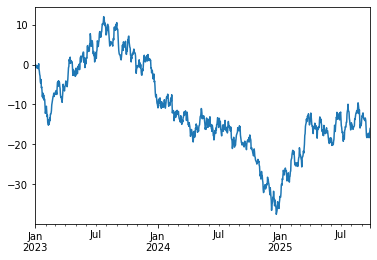

In [140]:
ts.plot()  #On DataFrame, plot()is a convenience to plot all of the columns with labels

In [141]:
plot_df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [142]:
plot_df = plot_df.cumsum()

<Figure size 432x288 with 0 Axes>

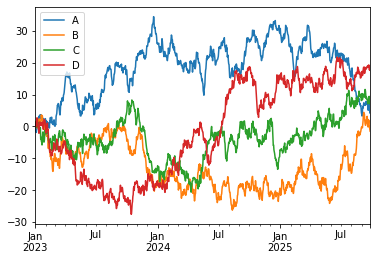

In [143]:
plt.figure()
plot_df.plot() 
plt.legend(loc='best')

# Getting Data In/Out: CSV

In [144]:
#Writing to a csv file.
plot_df.to_csv('New_Data.csv')

In [145]:
# Reading from a csv file
pd.read_csv('New_Data.csv')

,Unnamed: 0,A,B,C,D
0,2023-01-01,0.304299,1.246543,-0.085260,0.968542
1,2023-01-02,-0.921433,1.504435,0.621647,0.894797
2,2023-01-03,-1.162947,0.649803,-0.079873,-0.095645
3,2023-01-04,-1.868398,0.307316,1.066301,1.287405
4,2023-01-05,-1.034676,-0.410444,-0.313771,1.724278
...,...,...,...,...,...
995,2025-09-22,6.867733,1.968755,9.268937,19.321785
996,2025-09-23,6.054979,0.039699,9.441625,18.862116
997,2025-09-24,6.915599,0.107572,7.263364,17.719212
998,2025-09-25,4.212077,-0.896671,7.938503,19.056387


## HDF5 Reading and writing to HDF Stores Writing to a HDF5 Store

In [146]:
plot_df.to_hdf('Write.h5','plot_df')

In [147]:
#Reading from a HDF5 Store
pd.read_hdf('Write.h5','plot_df')

,A,B,C,D
2023-01-01,0.304299,1.246543,-0.085260,0.968542
2023-01-02,-0.921433,1.504435,0.621647,0.894797
2023-01-03,-1.162947,0.649803,-0.079873,-0.095645
2023-01-04,-1.868398,0.307316,1.066301,1.287405
2023-01-05,-1.034676,-0.410444,-0.313771,1.724278
...,...,...,...,...
2025-09-22,6.867733,1.968755,9.268937,19.321785
2025-09-23,6.054979,0.039699,9.441625,18.862116
2025-09-24,6.915599,0.107572,7.263364,17.719212
2025-09-25,4.212077,-0.896671,7.938503,19.056387


## Excel Reading and writing to MS Excel and Writing to an excel file

In [148]:
plot_df.to_excel('New_Excel.xlsx', sheet_name='Excel_Sheet1')

In [149]:
#Reading from an excel file
pd.read_excel('New_Excel.xlsx', 'Excel_Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2023-01-01,0.304299,1.246543,-0.085260,0.968542
1,2023-01-02,-0.921433,1.504435,0.621647,0.894797
2,2023-01-03,-1.162947,0.649803,-0.079873,-0.095645
3,2023-01-04,-1.868398,0.307316,1.066301,1.287405
4,2023-01-05,-1.034676,-0.410444,-0.313771,1.724278
...,...,...,...,...,...
995,2025-09-22,6.867733,1.968755,9.268937,19.321785
996,2025-09-23,6.054979,0.039699,9.441625,18.862116
997,2025-09-24,6.915599,0.107572,7.263364,17.719212
998,2025-09-25,4.212077,-0.896671,7.938503,19.056387


## Gotchas : If you are trying an operation and you see an exception like.
"gotchas" are issues or pitfalls that can easily trap a programmer who is not aware of them.<br>
 Here are some common gotchas in Pandas <br>
 (1) Beware of chained indexing <br>
 (2) NaN values can cause unexpected behavior <br>
 (3) Be careful when modifying data in place <br>
 (4) Watch out for data types <br>
 (5) Groupby can be confusing: The groupby method can be powerful for data aggregation and analysis, but it can also be <br>confusing to use, especially for beginners. Make sure to read the documentation carefully and test your code thoroughly to <br>ensure that your results are accurate<br>
 (6) you can avoid many common mistakes when working with Pandas.

In [150]:
if pd.Series([False, True, False]):
    print("Is it true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().